In [1]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings

In [2]:
base_dir = "dataset8"
train_path = os.path.join(base_dir, "train")
test_path = os.path.join(base_dir, "validation")

In [3]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [5]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(lr=0.0001),
    metrics=["accuracy"],
)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [7]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

Found 1797 images belonging to 4 classes.
Found 745 images belonging to 4 classes.


In [8]:
total_train_samples = len(train_generator.filenames)
total_validation_samples = len(test_generator.filenames)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=total_train_samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=total_validation_samples // batch_size,
)

Epoch 1/20
56/56 [==============================] - 587s 10s/step - loss: 1.0073 - accuracy: 0.5246 - val_loss: 0.4097 - val_accuracy: 0.7405
Epoch 2/20
56/56 [==============================] - 576s 10s/step - loss: 0.4905 - accuracy: 0.7343 - val_loss: 0.2791 - val_accuracy: 0.8492
Epoch 3/20
56/56 [==============================] - 595s 11s/step - loss: 0.2870 - accuracy: 0.8742 - val_loss: 0.2766 - val_accuracy: 0.8777
Epoch 4/20
56/56 [==============================] - 626s 11s/step - loss: 0.2466 - accuracy: 0.8992 - val_loss: 0.0860 - val_accuracy: 0.9660
Epoch 5/20
56/56 [==============================] - 625s 11s/step - loss: 0.1619 - accuracy: 0.9292 - val_loss: 0.2464 - val_accuracy: 0.8804
Epoch 6/20
56/56 [==============================] - 622s 11s/step - loss: 0.2858 - accuracy: 0.8958 - val_loss: 0.1820 - val_accuracy: 0.9130
Epoch 7/20
56/56 [==============================] - 617s 11s/step - loss: 0.1449 - accuracy: 0.9439 - val_loss: 0.2120 - val_accuracy: 0.9130
Epoch 

In [11]:
model.save("model11.h5")

c:\Users\Ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

NameError: name 'history' is not defined

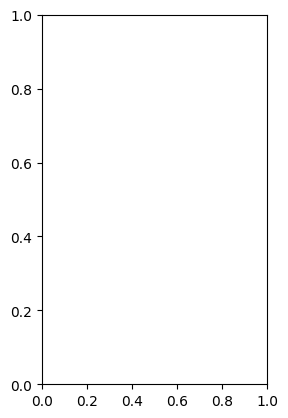

In [10]:
# Plot akurasi pelatihan dan validasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

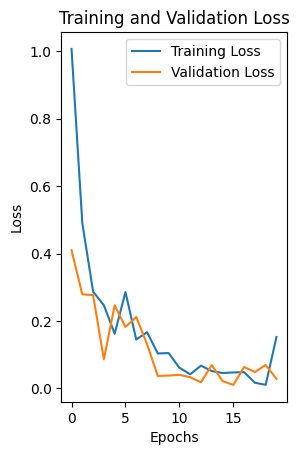

In [14]:
# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [2]:
# Menampilkan beberapa sampel hasil pengujian
num_samples = 5
test_images, test_labels = next(test_generator)

# Prediksi kelas
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Menampilkan sampel hasil pengujian
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i])
    plt.title(f'True: {test_generator.classes[i]}, Predicted: {predicted_classes[i]}')
    plt.axis('off')

plt.show()

NameError: name 'test_generator' is not defined

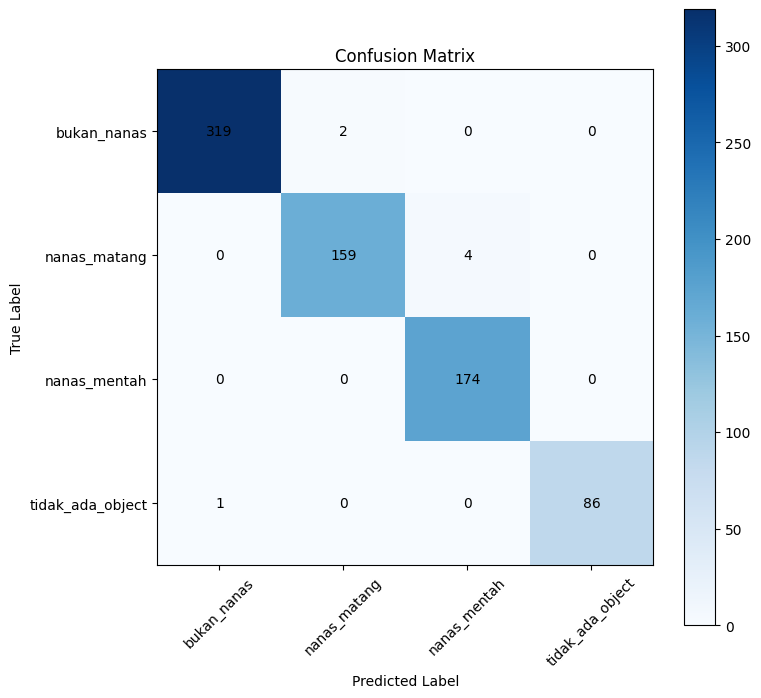

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       321
           1       0.99      0.98      0.98       163
           2       0.98      1.00      0.99       174
           3       1.00      0.99      0.99        87

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



In [27]:
# Menampilkan confusion matrix dengan nilai di setiap sel
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = list(test_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Menambahkan nilai di setiap sel
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [1]:
# Prediksi kelas untuk seluruh data uji
all_predicted_classes = []
all_true_classes = []

# Memproses data uji per batch
for i in range(len(test_generator)):
    test_images, true_classes = next(test_generator)
    predicted_classes = model.predict(test_images)
    predicted_classes = np.argmax(predicted_classes, axis=1)
    
    all_predicted_classes.extend(predicted_classes)
    all_true_classes.extend(true_classes.argmax(axis=1))

# Menghitung confusion matrix
cm = confusion_matrix(all_true_classes, all_predicted_classes)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = list(test_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(all_true_classes, all_predicted_classes))

NameError: name 'test_generator' is not defined